In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
data = pd.read_csv('MachineLearningData.csv')

In [ ]:
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [ ]:
data.shape

(639, 10)

In [ ]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [ ]:
data.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [ ]:
data.duplicated().sum()

1

In [ ]:
duplicated = data[data.duplicated()]
duplicated

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
378,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.nunique()

Year                  1
MAKE                 36
MODEL               328
VEHICLE CLASS        14
ENGINE SIZE          40
CYLINDERS             7
TRANSMISSION          8
FUEL                  5
FUEL CONSUMPTION    124
COEMISSIONS         116
dtype: int64

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


In [ ]:
numeric_data.corr()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
Year,NaN,NaN,NaN,NaN,NaN
ENGINE SIZE,NaN,1.000000,0.894084,0.858498,0.850188
CYLINDERS,NaN,0.894084,1.000000,0.825247,0.797799
FUEL CONSUMPTION,NaN,0.858498,0.825247,1.000000,0.983184
COEMISSIONS,NaN,0.850188,0.797799,0.983184,1.000000


<Axes: >

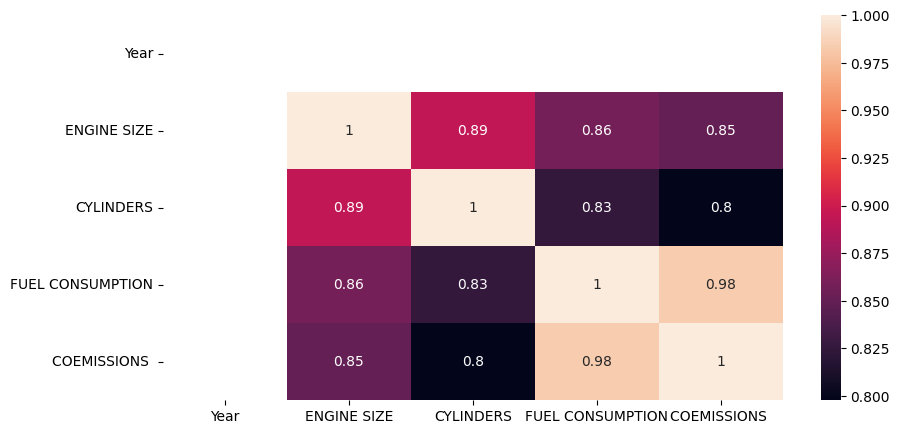

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(numeric_data.corr(),annot=True)

### Inference -
### 1) co2 emmision is increase or descreases as the fuel consumption
### increses or decreases as coemmisions is highly corelate to the fuel consumption.

### 2) As the engine size increases or decreases, the cylinder size also increases or decreases.

Mostly corelation lies between the 0.8 to 0.98
Other that their is no bigger difference in corelation of other

So we say that Enzine size, clinders with coemmision are good to relate

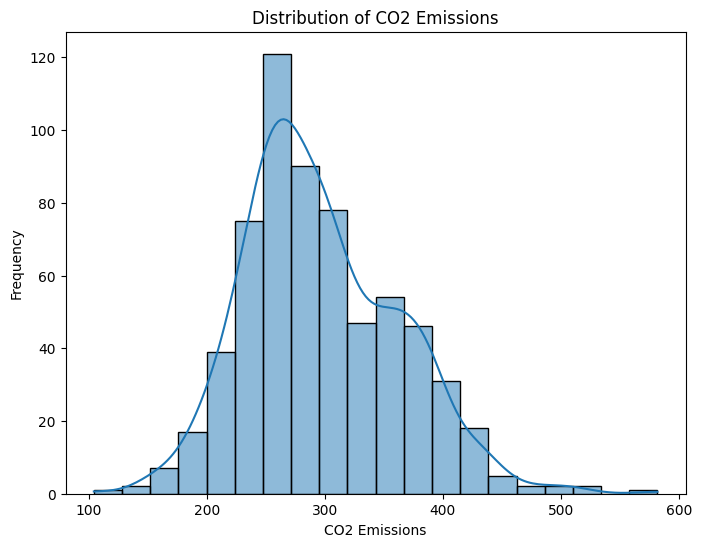

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['COEMISSIONS '], bins=20, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

### Highest coemmision is between 200 to 300.  Data is more lies between in 200 to 400. coemmision is least at 100 and between 500 to 600

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              638 non-null    int64  
 1   MAKE              638 non-null    object 
 2   MODEL             638 non-null    object 
 3   VEHICLE CLASS     638 non-null    object 
 4   ENGINE SIZE       638 non-null    float64
 5   CYLINDERS         638 non-null    int64  
 6   TRANSMISSION      638 non-null    object 
 7   FUEL              638 non-null    object 
 8   FUEL CONSUMPTION  638 non-null    float64
 9   COEMISSIONS       638 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 54.8+ KB


<ipython-input-61-e4735b8fd495>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['MAKE'], data=data, palette='viridis')


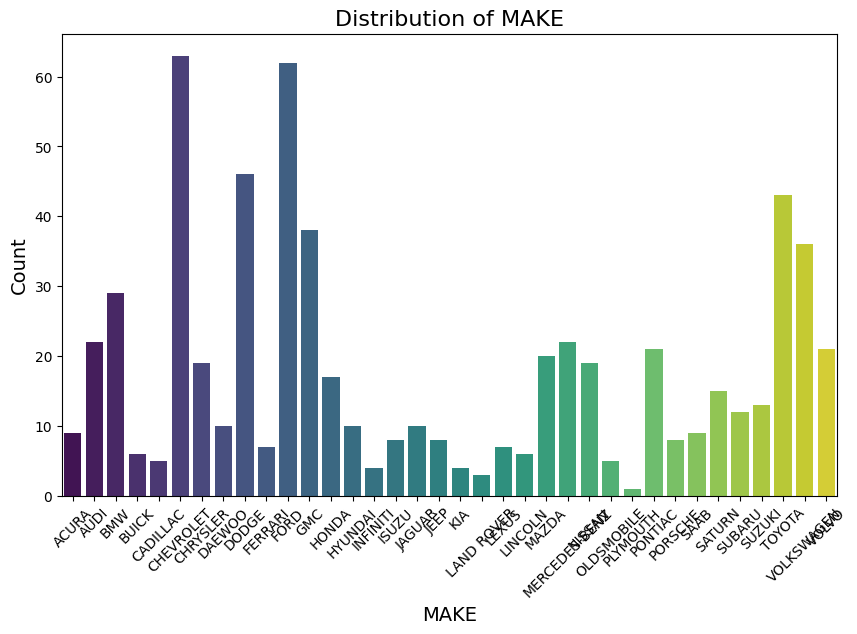

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['MAKE'], data=data, palette='viridis')
plt.title(f"Distribution of {data['MAKE'].name}", fontsize=16)
plt.xlabel(data['MAKE'].name, fontsize=14)  # Pass the column name as a string
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Cadillac making most as compare to the other and oldsmobile making the least as compare to the other.

<ipython-input-73-a609035e97e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['VEHICLE CLASS'], data=data, palette='viridis')


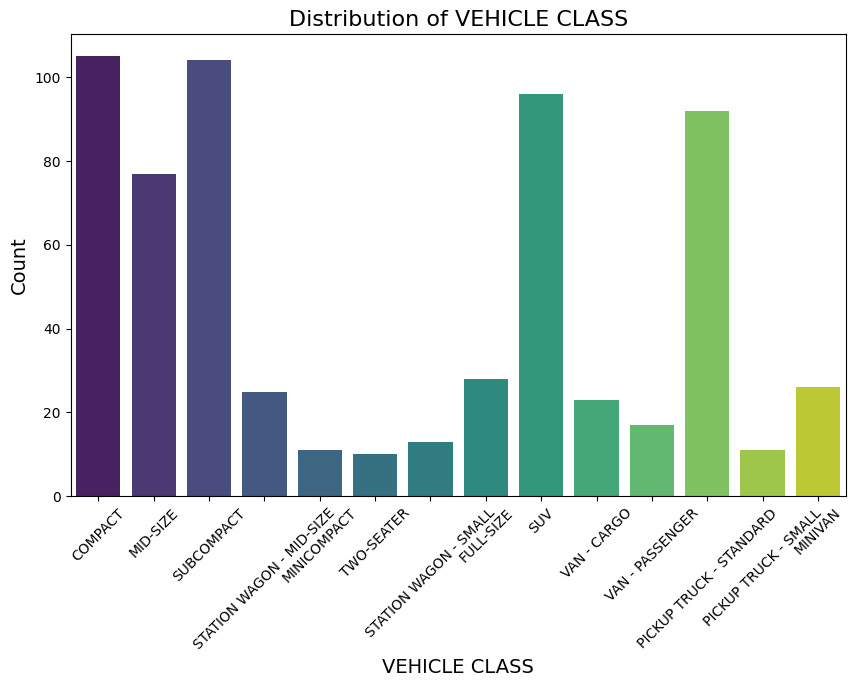

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['VEHICLE CLASS'], data=data, palette='viridis')
plt.title(f"Distribution of {data['VEHICLE CLASS'].name}", fontsize=16)
plt.xlabel(data['VEHICLE CLASS'].name, fontsize=14)  # Pass the column name as a string
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Mostly the vehicle class is Compact and Sub-compact.

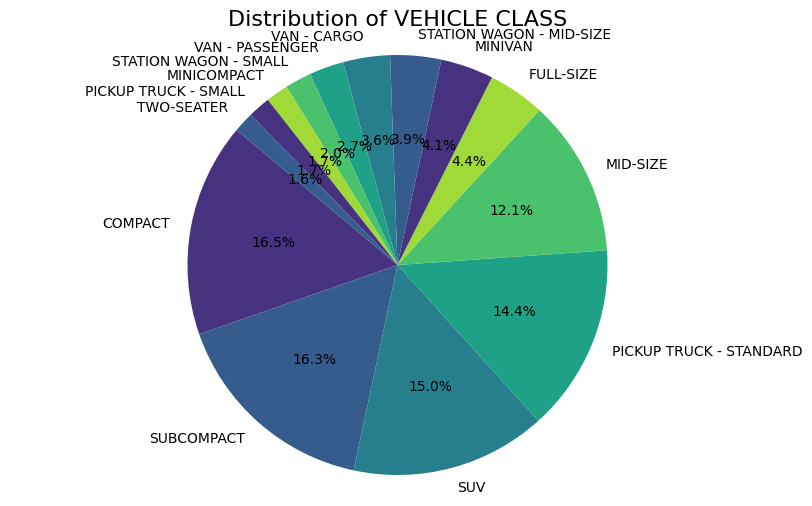

In [ ]:
vehicle_class_counts = data['VEHICLE CLASS'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(vehicle_class_counts, labels=vehicle_class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title(f"Distribution of {data['VEHICLE CLASS'].name}", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<ipython-input-67-27b5d5df3f46>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['TRANSMISSION'], data=data, palette='viridis')


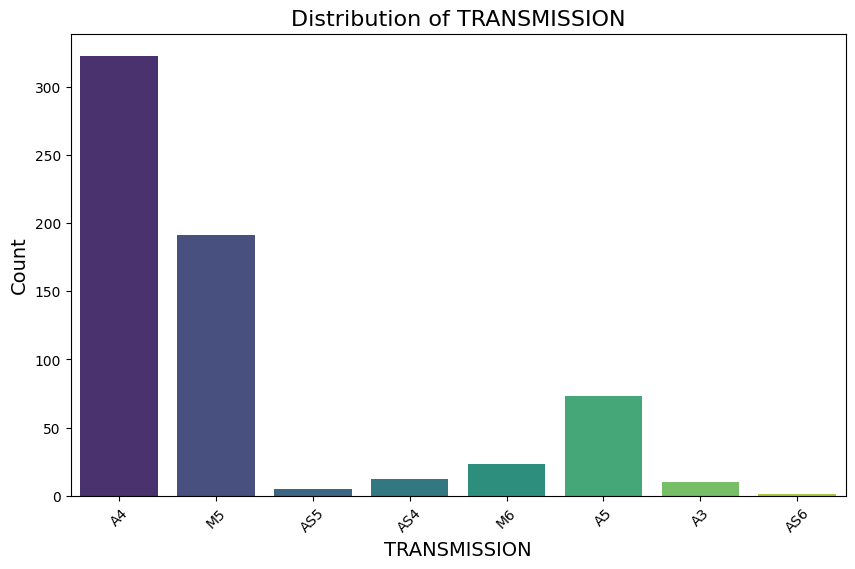

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['TRANSMISSION'], data=data, palette='viridis')
plt.title(f"Distribution of {data['TRANSMISSION'].name}", fontsize=16)
plt.xlabel(data['TRANSMISSION'].name, fontsize=14)  # Pass the column name as a string
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Mostly the transmission type is A4 and Least is AS6

In [ ]:
transmission_data = data['TRANSMISSION']
unique_transmissions = transmission_data.unique()
print("Unique Transmission Types:", unique_transmissions)

Unique Transmission Types: ['A4' 'M5' 'AS5' 'AS4' 'M6' 'A5' 'A3' 'AS6']


In [ ]:
transmission_summary = transmission_data.describe()
print("Summary Statistics for Transmission Types:")
print(transmission_summary)

Summary Statistics for Transmission Types:
count     638
unique      8
top        A4
freq      323
Name: TRANSMISSION, dtype: object


<ipython-input-68-a39d7764f443>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['FUEL'], data=data, palette='viridis')


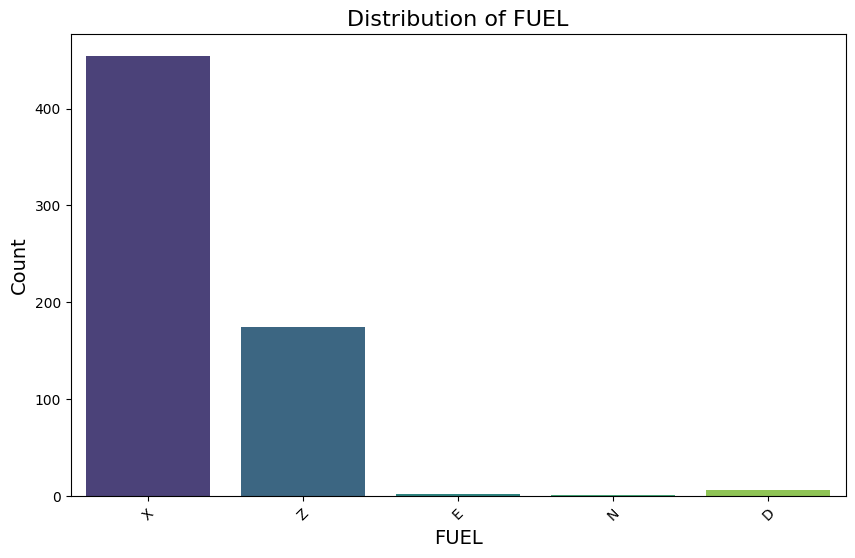

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['FUEL'], data=data, palette='viridis')
plt.title(f"Distribution of {data['FUEL'].name}", fontsize=16)
plt.xlabel(data['FUEL'].name, fontsize=14)  # Pass the column name as a string
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Maxmimum X type fuel is used and N type fuel used at least amount

In [ ]:
data.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [ ]:
data.columns = data.columns.str.rstrip()

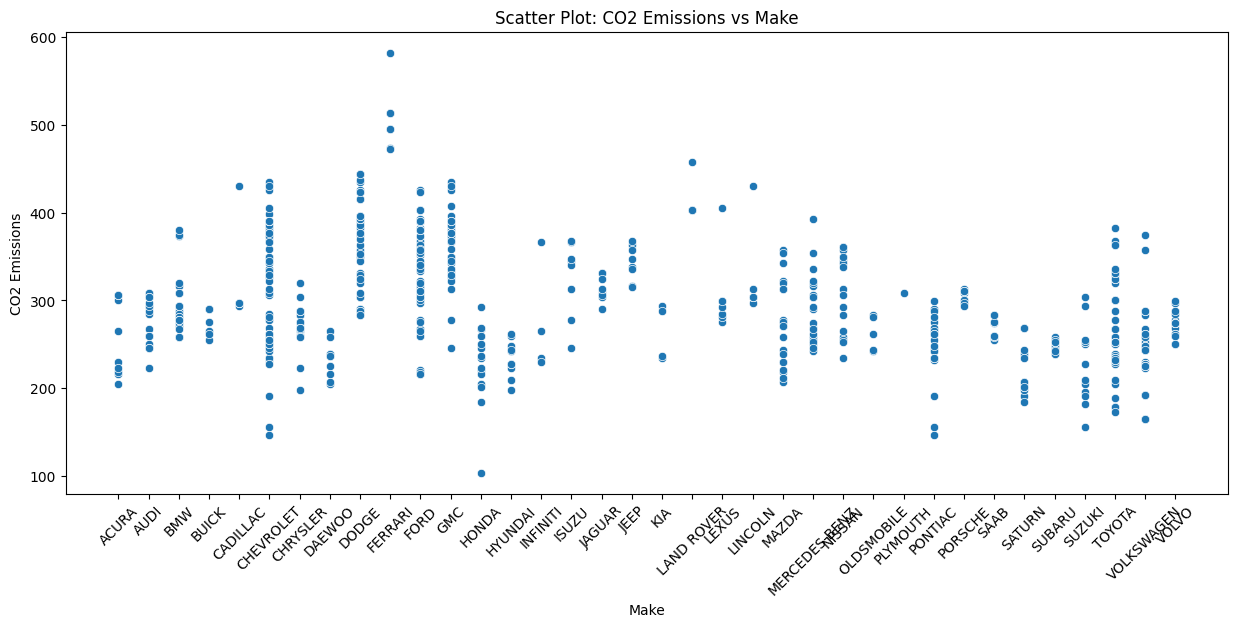

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=data, x='MAKE', y = 'COEMISSIONS')
plt.title('Scatter Plot: CO2 Emissions vs Make')
plt.xlabel('Make')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

### Highest co2 emmited by the DODGE maker

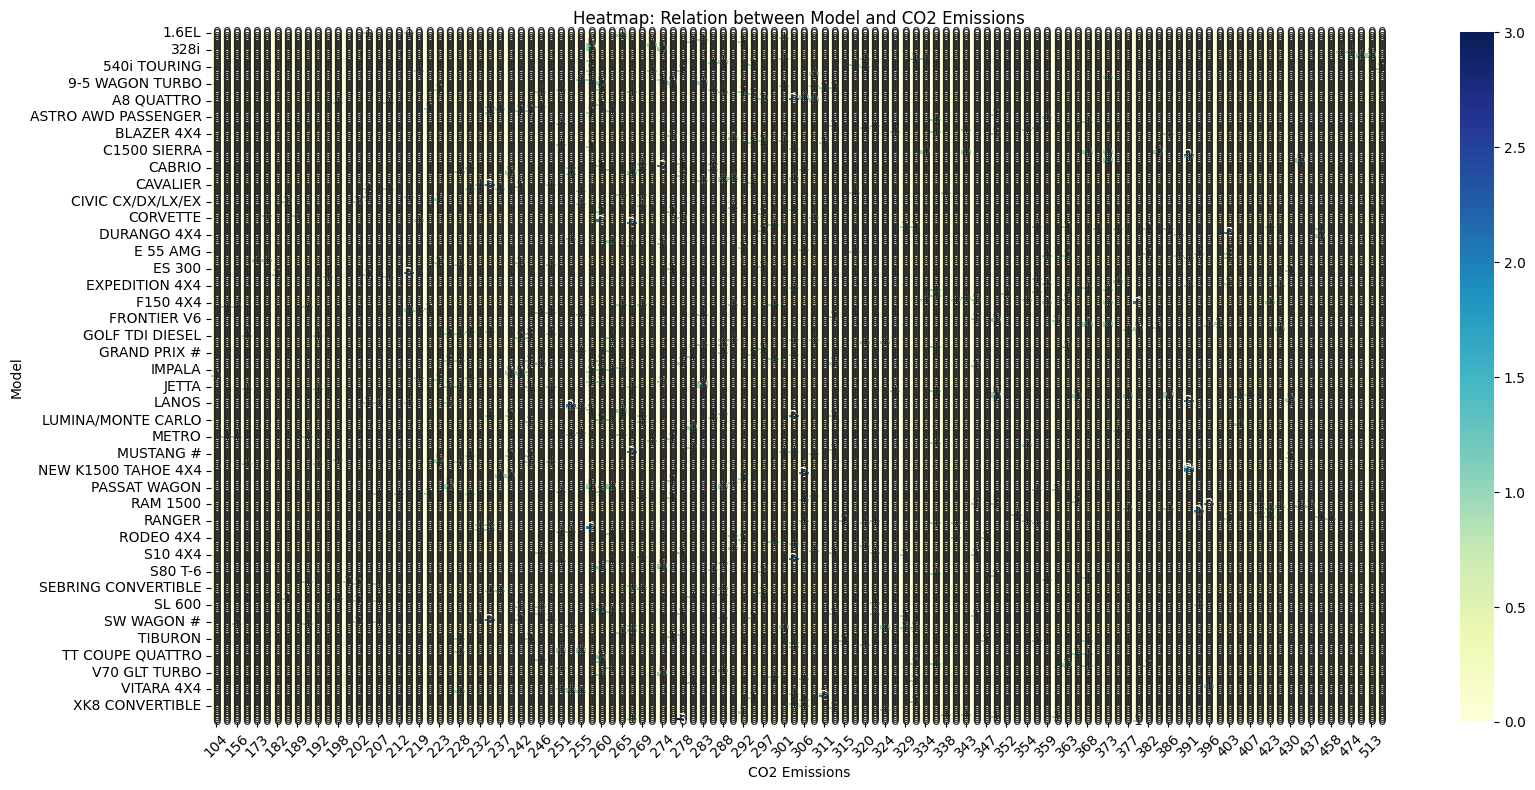

In [ ]:
heatmap_data = data.pivot_table(index='MODEL', columns='COEMISSIONS', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(17, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap: Relation between Model and CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

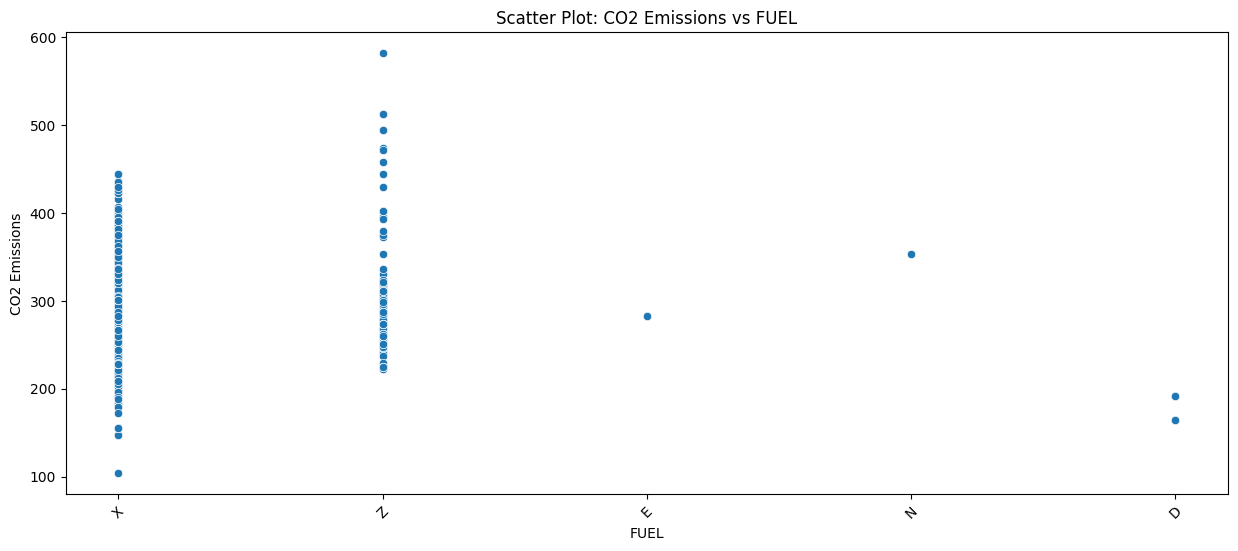

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=data, x='FUEL', y = 'COEMISSIONS')
plt.title('Scatter Plot: CO2 Emissions vs FUEL')
plt.xlabel('FUEL')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


### Maximum comission is Z type fuel and least coemmission by X type fuel

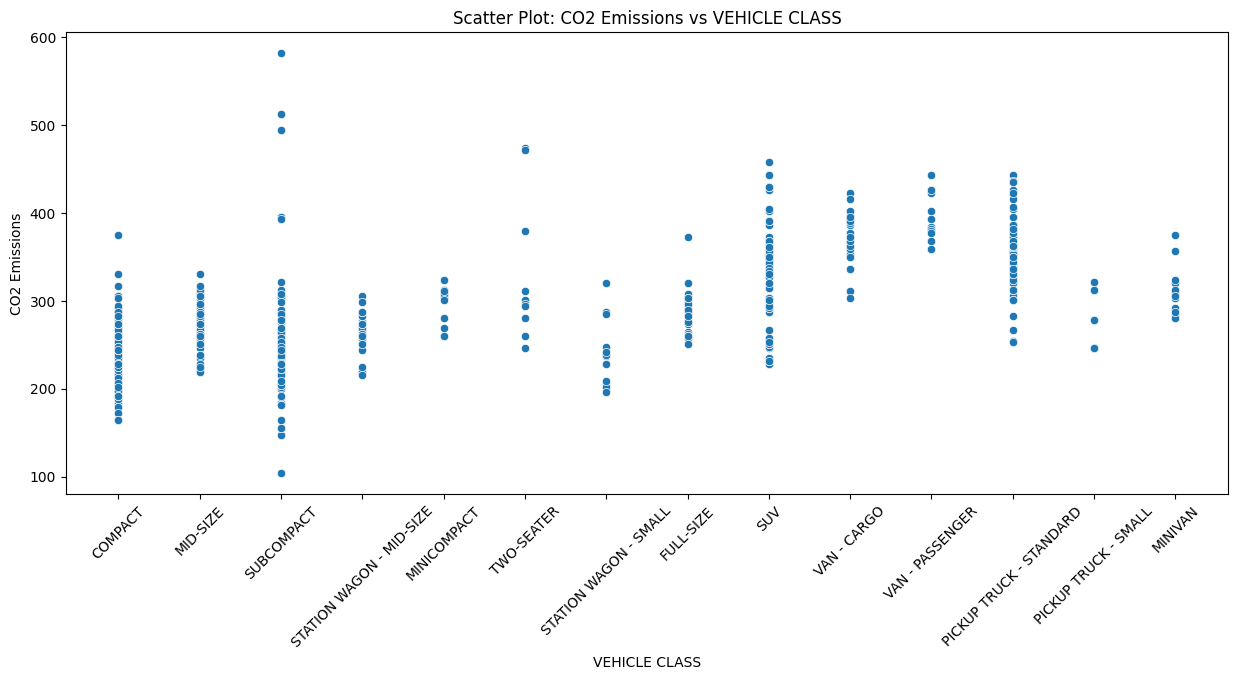

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=data, x='VEHICLE CLASS', y = 'COEMISSIONS')
plt.title('Scatter Plot: CO2 Emissions vs VEHICLE CLASS')
plt.xlabel('VEHICLE CLASS')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

### The highest coemmision is with subcompact vehicle class

## Model Building


In [ ]:
data = pd.read_csv("MachineLearningData.csv")
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
col = data.columns

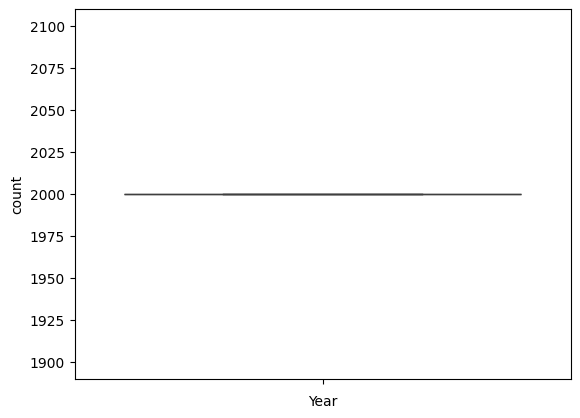

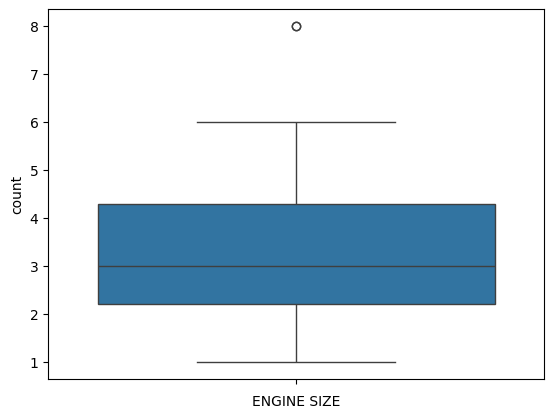

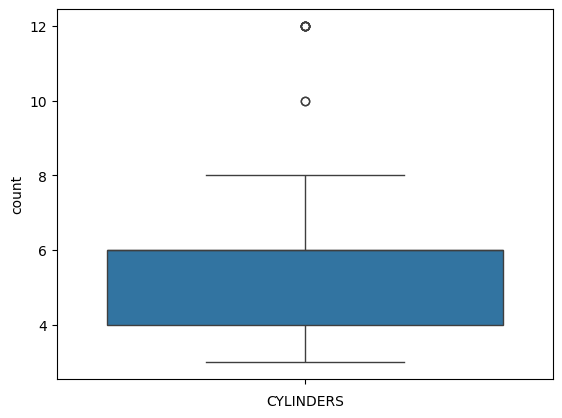

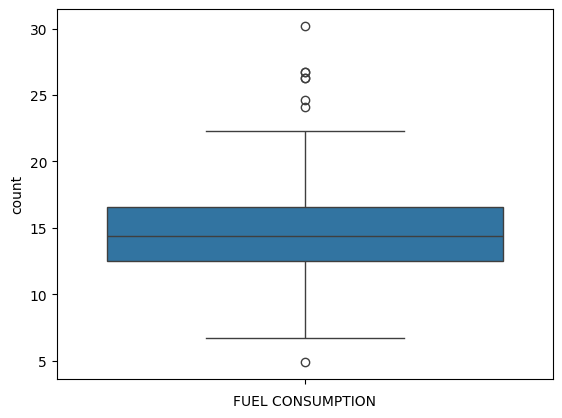

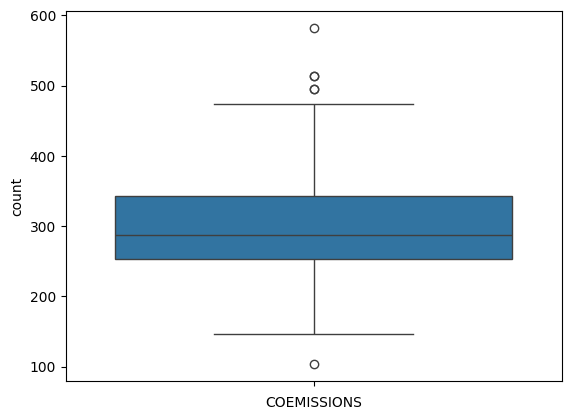

In [ ]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()


In [ ]:
data.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS'],
      dtype='object')

In [ ]:
outliers = data[['CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS']]
for i in outliers:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3-Q1
  data = data[(data[i]>=Q1-1.5*IQR) & (data[i]<= Q3+1.5*IQR)]

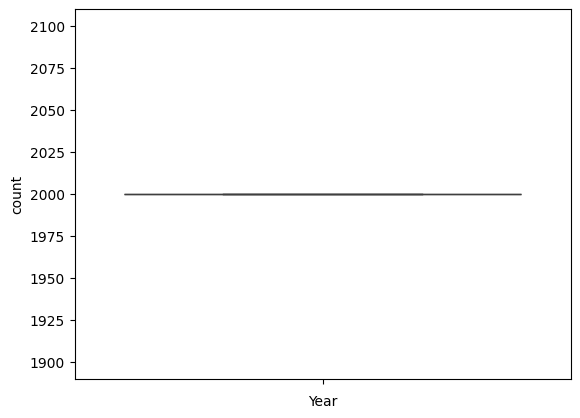

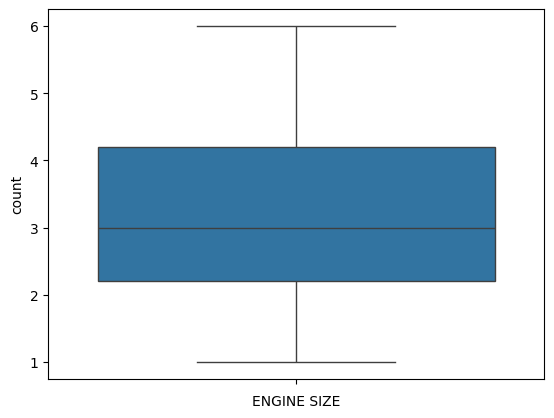

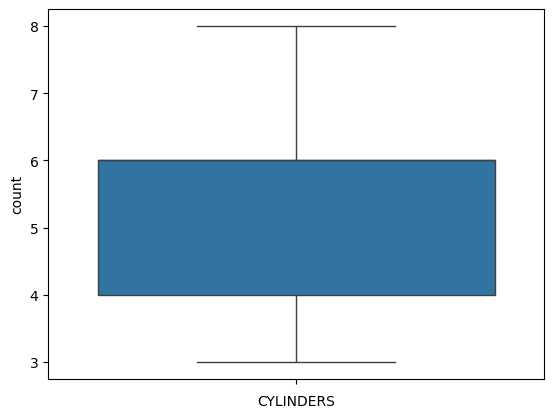

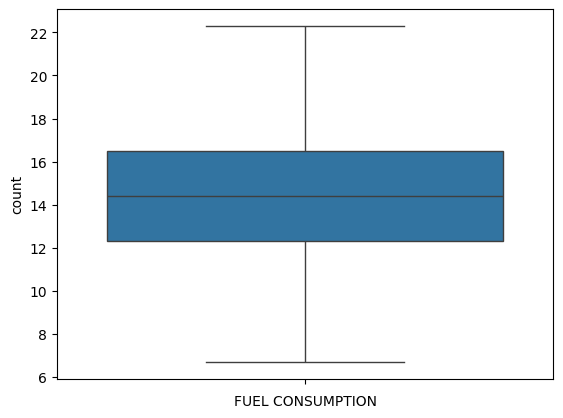

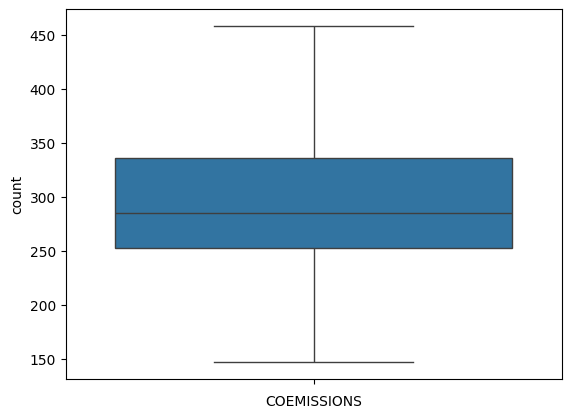

In [ ]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()


In [ ]:
X = data.drop(columns=['COEMISSIONS'])
y = data['COEMISSIONS']


In [ ]:
X

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4
...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0


In [ ]:
data['Year'].value_counts()

Year
2000    627
Name: count, dtype: int64

In [ ]:
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numeric_features = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION'	]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

In [ ]:
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 35.050180952380956


In [ ]:
y_pred

array([225.01, 181.14, 255.56, 388.09, 261.09, 361.  , 291.02, 388.02,
       328.96, 267.02, 243.25, 289.77, 267.55, 242.77, 189.7 , 345.76,
       279.31, 387.72, 354.87, 329.95, 253.69, 267.09, 307.02, 271.69,
       206.09, 262.36, 240.2 , 242.02, 287.2 , 311.37, 287.47, 251.14,
       201.05, 349.93, 278.27, 259.59, 216.95, 260.73, 390.89, 228.19,
       340.82, 274.92, 270.2 , 363.59, 241.35, 299.23, 267.44, 318.24,
       367.15, 313.75, 438.54, 219.72, 225.97, 267.44, 277.89, 376.32,
       267.91, 291.99, 386.17, 260.26, 242.53, 238.71, 310.64, 288.02,
       216.65, 281.32, 277.19, 270.61, 253.91, 201.95, 220.19, 307.53,
       342.43, 345.43, 371.33, 253.99, 260.14, 350.18, 360.7 , 305.05,
       367.5 , 269.98, 244.59, 282.05, 390.05, 180.44, 287.29, 303.02,
       246.73, 329.67, 322.17, 429.47, 246.33, 426.92, 418.12, 244.96,
       354.63, 266.31, 253.14, 245.86, 421.84, 266.2 , 254.39, 261.18,
       326.64, 379.31, 390.54, 428.21, 264.97, 370.22, 262.94, 185.04,
      

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'model' has been trained and 'X_train', 'y_train', 'X_test', 'y_test' are available
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3.648253968253967
Mean Squared Error: 32.26600158730158
Root Mean Squared Error: 5.680317032288038
R-squared: 0.9916599576667037


#### Mean Absolute Error: 3.648253968253967
#### Mean Squared Error: 32.26600158730158
#### Root Mean Squared Error: 5.680317032288038
#### R-squared: 0.9916599576667037

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col:
    data[i]=labelencoder.fit_transform(data[i])

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)
data_encoded

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,0,0,0,0,3,1,1,3,19,18
1,0,0,0,0,3,1,5,3,12,14
2,0,0,1,2,16,3,4,4,48,39
3,0,0,2,2,19,3,1,4,60,55
4,0,0,158,9,4,1,1,3,26,24
...,...,...,...,...,...,...,...,...,...,...
634,0,34,296,7,9,2,1,4,54,49
635,0,34,297,7,9,2,1,4,47,43
636,0,34,298,7,8,2,1,4,50,43
637,0,34,298,7,8,2,5,4,41,37


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV


model = RandomForestRegressor()


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)


y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (on test set):", mse)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_dep

### Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error (on test set): 5.929067096739672

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'model' has been trained and 'X_train', 'y_train', 'X_test', 'y_test' are available
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1.628888888888889
Mean Squared Error: 5.522879365079365
Root Mean Squared Error: 2.350080714588196
R-squared: 0.9920135053660328


### MAE, MSE, RMSE is reduced and R- squared value is increased by using GridSearchCV